## Import Tools

In [15]:
import torch
import torch.nn as nn
import numpy as np
import scipy.io
import random
import math
import matplotlib.pyplot as plt
import torch.nn.functional as F
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score

In [16]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Neural_Network/project_1/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Dataset Processing

### Read in the original dataset

In [17]:
# train_dl_origin = torch.load('Dataset/train_dl.pt')
# valid_dl_origin = torch.load('Dataset/valid_dl.pt')

# train_CSI = train_dl_origin.dataset[:][0]
# train_label = train_dl_origin.dataset[:][1][:,0:2]

# valid_CSI = valid_dl_origin.dataset[:][0]
# valid_label = valid_dl_origin.dataset[:][1][:,0:2]

### CSI Processing: Take Modulus of complex matrices

In [ ]:
# train_CSI_modulus = torch.abs(train_CSI)
# valid_CSI_modulus = torch.abs(valid_CSI)

In [ ]:
# print(train_CSI_modulus.shape)
# print(valid_CSI_modulus.shape)
# print(train_label.shape)

torch.Size([15000, 1, 4, 1632])
torch.Size([5000, 1, 4, 1632])
torch.Size([15000, 2])


Running on: cpu


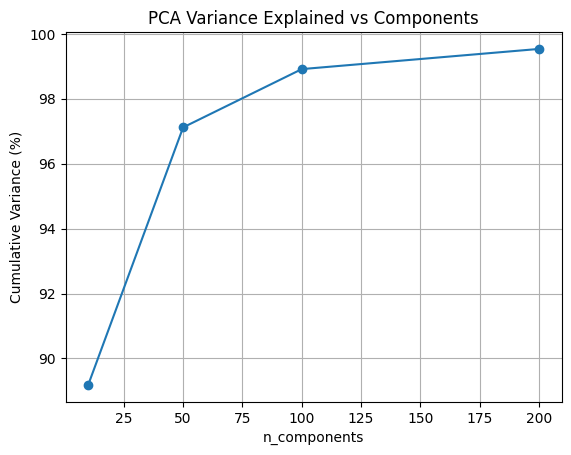

normal PCA completed!!
PCA completed!!


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.12/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


isomap completed!!


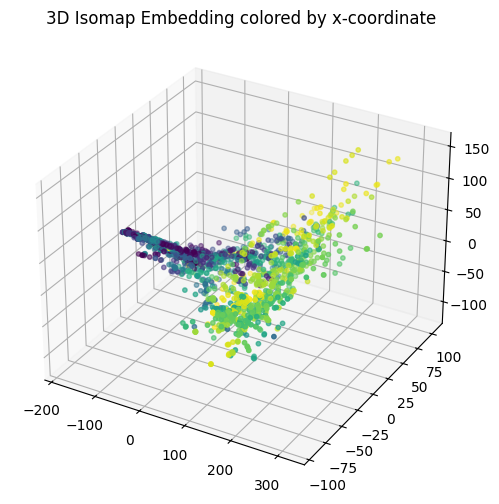

KMeans Silhouette Score (PCA): 0.2821


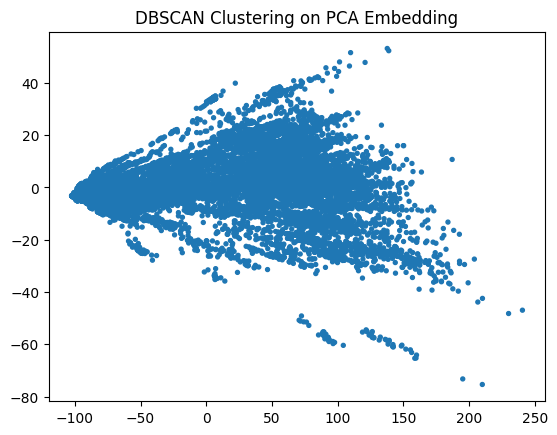

LinearRegression RMSE=6.6042 | R²=0.5391 | Params={}
Ridge           RMSE=6.6042 | R²=0.5391 | Params={'alpha': 10}
Lasso           RMSE=6.6045 | R²=0.5391 | Params={'alpha': 0.01}
RandomForest    RMSE=0.8411 | R²=0.9929 | Params={'max_depth': None, 'n_estimators': 200}
XGBoost         RMSE=0.9290 | R²=0.9913 | Params={'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}

Cross-Validation Summary:
               Model      RMSE        R2  \
0  LinearRegression  6.604225  0.539131   
1             Ridge  6.604219  0.539131   
2             Lasso  6.604488  0.539100   
3      RandomForest  0.841065  0.992862   
4           XGBoost  0.928993  0.991310   

                                          BestParams  
0                                                 {}  
1                                      {'alpha': 10}  
2                                    {'alpha': 0.01}  
3           {'max_depth': None, 'n_estimators': 200}  
4  {'learning_rate': 0.1, 'max_depth': 7

/tmp/ipython-input-4144817969.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=results_df, palette='mako')


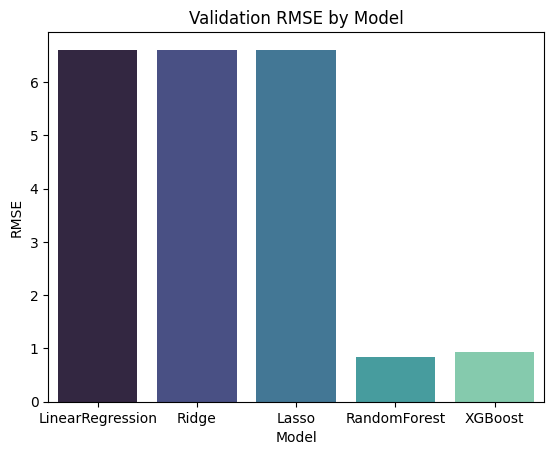

Epoch 01/30 | Loss=168.4046 | ValRMSE=8.4790
Epoch 02/30 | Loss=65.5012 | ValRMSE=6.5841
Epoch 03/30 | Loss=48.4072 | ValRMSE=5.7092
Epoch 04/30 | Loss=40.1425 | ValRMSE=5.1050
Epoch 05/30 | Loss=35.4312 | ValRMSE=4.7062
Epoch 06/30 | Loss=32.5742 | ValRMSE=4.3155
Epoch 07/30 | Loss=29.4079 | ValRMSE=4.0276
Epoch 08/30 | Loss=27.7806 | ValRMSE=3.8620
Epoch 09/30 | Loss=26.8864 | ValRMSE=3.6295
Epoch 10/30 | Loss=24.7319 | ValRMSE=3.5904
Epoch 11/30 | Loss=23.7520 | ValRMSE=3.3083
Epoch 12/30 | Loss=23.0504 | ValRMSE=3.2130
Epoch 13/30 | Loss=22.5161 | ValRMSE=3.0793
Epoch 14/30 | Loss=21.8534 | ValRMSE=3.0007
Epoch 15/30 | Loss=21.0734 | ValRMSE=3.0237
Epoch 16/30 | Loss=21.0222 | ValRMSE=2.8473
Epoch 17/30 | Loss=20.2924 | ValRMSE=2.7651
Epoch 18/30 | Loss=19.9134 | ValRMSE=2.7844
Epoch 19/30 | Loss=19.3670 | ValRMSE=2.6792
Epoch 20/30 | Loss=19.5835 | ValRMSE=2.6783
Epoch 21/30 | Loss=19.3656 | ValRMSE=2.6237
Epoch 22/30 | Loss=18.9535 | ValRMSE=2.5274
Epoch 23/30 | Loss=18.4652 | Va

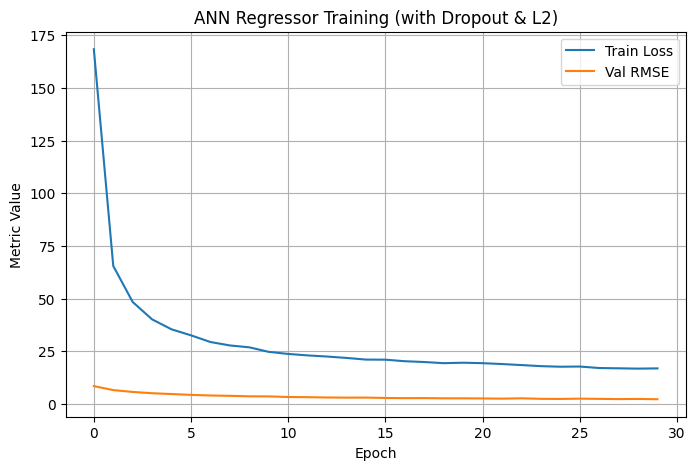


✅ ANN Final RMSE=2.2530, R²=0.9412


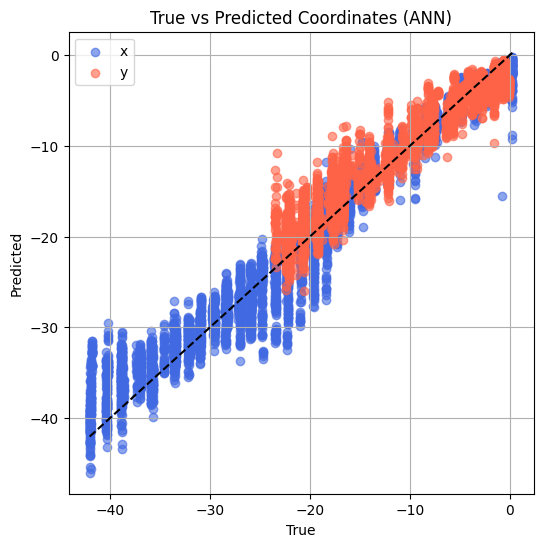

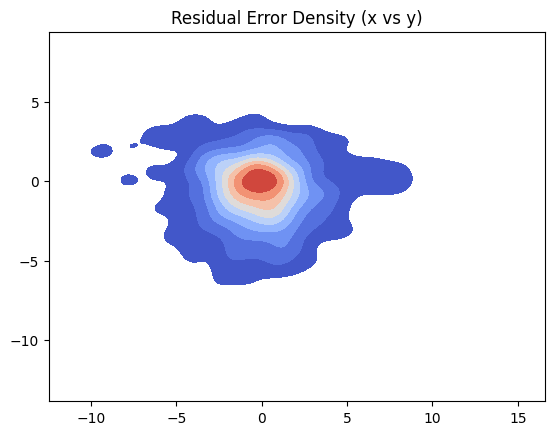

In [5]:
# VEHICLE POSITIONING REGRESSION – COMPLETE GPU EXPERIMENT

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, KernelPCA, SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import Isomap
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
import torch.nn as nn
import torch.optim as optim

# Setup & Data Loading

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Running on:", device)


train_dl_origin = torch.load(path + 'train_dl.pt', weights_only=False)
valid_dl_origin = torch.load(path + 'valid_dl.pt', weights_only=False)

train_CSI = train_dl_origin.dataset[:][0]
train_label_full = train_dl_origin.dataset[:][1]
valid_CSI = valid_dl_origin.dataset[:][0]
valid_label_full = valid_dl_origin.dataset[:][1]

# Compute magnitude & flatten
train_X = torch.abs(train_CSI).view(train_CSI.shape[0], -1).numpy()
valid_X = torch.abs(valid_CSI).view(valid_CSI.shape[0], -1).numpy()

train_y = train_label_full[:, :2].numpy()  # x, y regression
valid_y = valid_label_full[:, :2].numpy()

# Standardization & PCA / SparsePCA / KernelPCA

scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
valid_X_scaled = scaler.transform(valid_X)

# Variance exploration
components = [10, 50, 100, 200]
explained = []
for n in components:
    pca = PCA(n_components=n).fit(train_X_scaled)
    explained.append(np.sum(pca.explained_variance_ratio_))
plt.plot(components, np.array(explained)*100, 'o-')
plt.title("PCA Variance Explained vs Components")
plt.xlabel("n_components"); plt.ylabel("Cumulative Variance (%)")
plt.grid(); plt.show()

# Choose optimal dimension
best_n = 100
pca = PCA(n_components=best_n)
train_pca = pca.fit_transform(train_X_scaled)
valid_pca = pca.transform(valid_X_scaled)
print("normal PCA completed!!")

# # Sparse PCA
# spca = SparsePCA(n_components=best_n
# # Sparse PCA
# spca = SparsePCA(n_components=best_n, random_state=42)
# spca_train = spca.fit_transform(train_X_scaled)

# Kernel PCA (nonlinear)
kpca = KernelPCA(n_components=10, kernel='rbf', random_state=42)
kpca_train = kpca.fit_transform(train_X_scaled[:2000])
print("PCA completed!!")

# Cluster & Manifold Analysis

# Isomap embedding for geometric structure
isomap = Isomap(n_neighbors=10, n_components=3)
embed = isomap.fit_transform(train_X_scaled[:2000])
print("isomap completed!!")
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embed[:,0], embed[:,1], embed[:,2], c=train_y[:2000,0], cmap='viridis', s=10)
ax.set_title("3D Isomap Embedding colored by x-coordinate")
plt.show()

# Clustering (KMeans, DBSCAN) in PCA space
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(train_pca)
sil = silhouette_score(train_pca, kmeans_labels)
print(f"KMeans Silhouette Score (PCA): {sil:.4f}")

dbscan = DBSCAN(eps=1.0, min_samples=50)
db_labels = dbscan.fit_predict(train_pca)
plt.scatter(train_pca[:,0], train_pca[:,1], c=db_labels, cmap='tab10', s=8)
plt.title("DBSCAN Clustering on PCA Embedding")
plt.show()


# Model Setup for Regression (CV + Regularization)

kf = KFold(n_splits=3, shuffle=True, random_state=42)

param_grids = {
    'LinearRegression': {},
    'Ridge': {'alpha': [0.01, 0.1, 1, 10]},
    'Lasso': {'alpha': [0.001, 0.01, 0.1, 1]},
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, None]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0]
    }
}

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(
        objective='reg:squarederror',
        eval_metric='rmse',
        tree_method='gpu_hist' if torch.cuda.is_available() else 'auto',
        random_state=42
    )
}

results = []
for name, model in models.items():
    grid = GridSearchCV(model, param_grids[name], cv=kf, scoring='neg_root_mean_squared_error', n_jobs=-1)
    grid.fit(train_pca, train_y)
    preds = grid.best_estimator_.predict(valid_pca)
    rmse = np.sqrt(mean_squared_error(valid_y, preds))
    r2 = r2_score(valid_y, preds)
    print(f"{name:<15} RMSE={rmse:.4f} | R²={r2:.4f} | Params={grid.best_params_}")
    results.append((name, rmse, r2, grid.best_params_))

results_df = pd.DataFrame(results, columns=['Model','RMSE','R2','BestParams'])
print("\nCross-Validation Summary:\n", results_df)

sns.barplot(x='Model', y='RMSE', data=results_df, palette='mako')
plt.title("Validation RMSE by Model")
plt.show()

# ANN Regressor with Regularization

class ANNRegressor(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 2)
        )
    def forward(self, x): return self.net(x)

input_dim = train_pca.shape[1]
ann = ANNRegressor(input_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(ann.parameters(), lr=0.001, weight_decay=1e-4)

X_train_t = torch.tensor(train_pca, dtype=torch.float32).to(device)
y_train_t = torch.tensor(train_y, dtype=torch.float32).to(device)
X_valid_t = torch.tensor(valid_pca, dtype=torch.float32).to(device)
y_valid_t = torch.tensor(valid_y, dtype=torch.float32).to(device)

epochs, batch_size = 30, 256
train_loss_log, val_rmse_log = [], []

for epoch in range(epochs):
    ann.train()
    perm = torch.randperm(X_train_t.size(0))
    total_loss = 0
    for i in range(0, X_train_t.size(0), batch_size):
        idx = perm[i:i+batch_size]
        xb, yb = X_train_t[idx], y_train_t[idx]
        optimizer.zero_grad()
        out = ann(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * len(xb)
    ann.eval()
    with torch.no_grad():
        preds = ann(X_valid_t)
        rmse = torch.sqrt(criterion(preds, y_valid_t)).item()
    avg_loss = total_loss / X_train_t.size(0)
    train_loss_log.append(avg_loss); val_rmse_log.append(rmse)
    print(f"Epoch {epoch+1:02d}/{epochs} | Loss={avg_loss:.4f} | ValRMSE={rmse:.4f}")

plt.figure(figsize=(8,5))
plt.plot(range(epochs), train_loss_log, label="Train Loss")
plt.plot(range(epochs), val_rmse_log, label="Val RMSE")
plt.xlabel("Epoch"); plt.ylabel("Metric Value")
plt.title("ANN Regressor Training (with Dropout & L2)")
plt.legend(); plt.grid(True); plt.show()


# Evaluation & Visualization

ann.eval()
with torch.no_grad():
    preds_ann = ann(X_valid_t).cpu().numpy()

rmse_final = np.sqrt(mean_squared_error(valid_y, preds_ann))
r2_final = r2_score(valid_y, preds_ann)
print(f"\n✅ ANN Final RMSE={rmse_final:.4f}, R²={r2_final:.4f}")

# Scatter plot of true vs predicted
plt.figure(figsize=(6,6))
plt.scatter(valid_y[:,0], preds_ann[:,0], c='royalblue', alpha=0.6, label='x')
plt.scatter(valid_y[:,1], preds_ann[:,1], c='tomato', alpha=0.6, label='y')
plt.plot([valid_y.min(), valid_y.max()], [valid_y.min(), valid_y.max()], 'k--')
plt.xlabel("True"); plt.ylabel("Predicted")
plt.title("True vs Predicted Coordinates (ANN)")
plt.legend(); plt.grid(True)
plt.show()

# Residual heatmap
errors = valid_y - preds_ann
sns.kdeplot(x=errors[:,0], y=errors[:,1], fill=True, cmap='coolwarm')
plt.title("Residual Error Density (x vs y)")
plt.show()

Experiment - 2 (with dense layer)

Epoch 01/30 | Loss=223.0886 | ValRMSE=7.3869
Epoch 02/30 | Loss=38.1155 | ValRMSE=5.2032
Epoch 03/30 | Loss=21.9954 | ValRMSE=3.3338
Epoch 04/30 | Loss=14.4293 | ValRMSE=2.4319
Epoch 05/30 | Loss=11.3832 | ValRMSE=1.9939
Epoch 06/30 | Loss=9.6590 | ValRMSE=1.7583
Epoch 07/30 | Loss=8.9612 | ValRMSE=1.6765
Epoch 08/30 | Loss=8.3937 | ValRMSE=1.5292
Epoch 09/30 | Loss=7.9252 | ValRMSE=1.5058
Epoch 10/30 | Loss=7.6614 | ValRMSE=1.4796
Epoch 11/30 | Loss=7.2985 | ValRMSE=1.3950
Epoch 12/30 | Loss=7.3575 | ValRMSE=1.2535
Epoch 13/30 | Loss=6.9181 | ValRMSE=1.2848
Epoch 14/30 | Loss=6.7509 | ValRMSE=1.2659
Epoch 15/30 | Loss=6.3386 | ValRMSE=1.1324
Epoch 16/30 | Loss=6.1306 | ValRMSE=1.1298
Epoch 17/30 | Loss=6.0028 | ValRMSE=1.1404
Epoch 18/30 | Loss=5.8567 | ValRMSE=1.1112
Epoch 19/30 | Loss=5.6917 | ValRMSE=1.0706
Epoch 20/30 | Loss=5.5340 | ValRMSE=1.0282
Epoch 21/30 | Loss=5.5529 | ValRMSE=0.9899
Epoch 22/30 | Loss=5.5761 | ValRMSE=1.0153
Epoch 23/30 | Loss=5.1226 | ValRMSE=0.9516
Epoch

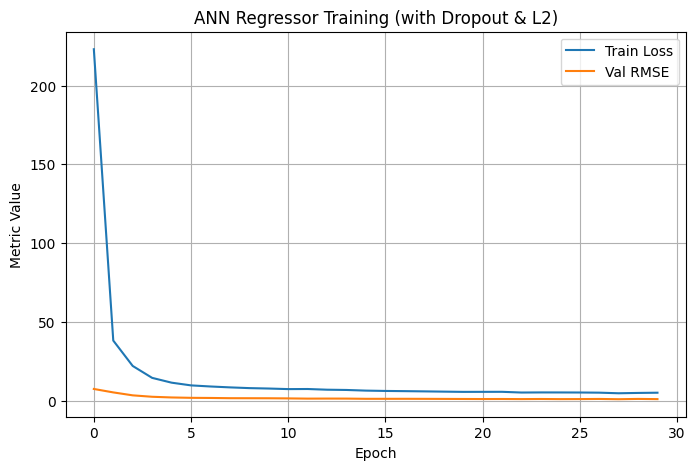


✅ ANN Final RMSE=0.9361, R²=0.9902


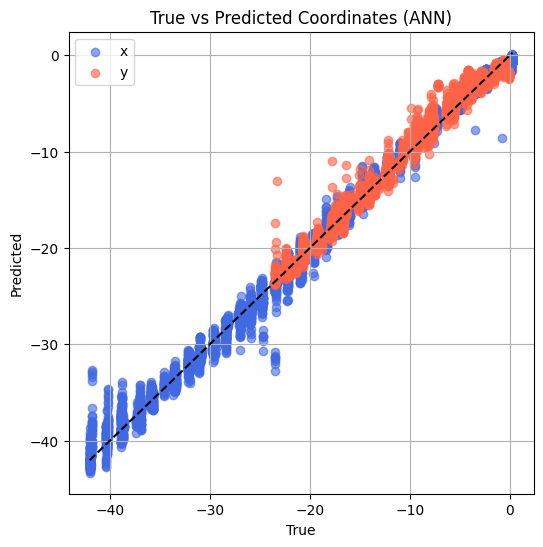

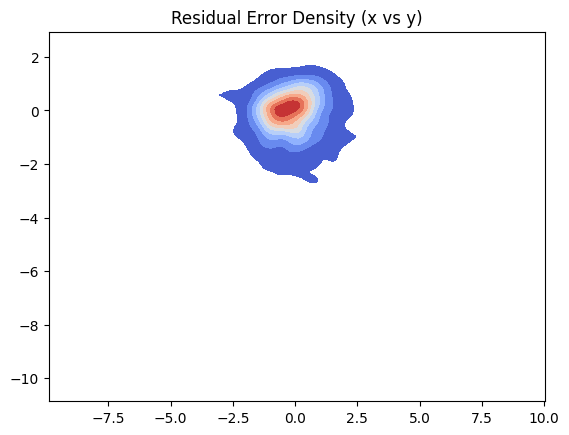

In [14]:
class ANNRegressor_Enhanced(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.25),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.ReLU(),

            nn.Linear(64, 2)
        )

    def forward(self, x):
        return self.net(x)
input_dim = train_pca.shape[1]
ann = ANNRegressor_Enhanced(input_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(ann.parameters(), lr=0.001, weight_decay=1e-4)

X_train_t = torch.tensor(train_pca, dtype=torch.float32).to(device)
y_train_t = torch.tensor(train_y, dtype=torch.float32).to(device)
X_valid_t = torch.tensor(valid_pca, dtype=torch.float32).to(device)
y_valid_t = torch.tensor(valid_y, dtype=torch.float32).to(device)

epochs, batch_size = 30, 256
train_loss_log, val_rmse_log = [], []

for epoch in range(epochs):
    ann.train()
    perm = torch.randperm(X_train_t.size(0))
    total_loss = 0
    for i in range(0, X_train_t.size(0), batch_size):
        idx = perm[i:i+batch_size]
        xb, yb = X_train_t[idx], y_train_t[idx]
        optimizer.zero_grad()
        out = ann(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * len(xb)
    ann.eval()
    with torch.no_grad():
        preds = ann(X_valid_t)
        rmse = torch.sqrt(criterion(preds, y_valid_t)).item()
    avg_loss = total_loss / X_train_t.size(0)
    train_loss_log.append(avg_loss); val_rmse_log.append(rmse)
    print(f"Epoch {epoch+1:02d}/{epochs} | Loss={avg_loss:.4f} | ValRMSE={rmse:.4f}")

plt.figure(figsize=(8,5))
plt.plot(range(epochs), train_loss_log, label="Train Loss")
plt.plot(range(epochs), val_rmse_log, label="Val RMSE")
plt.xlabel("Epoch"); plt.ylabel("Metric Value")
plt.title("ANN Regressor Training (with Dropout & L2)")
plt.legend(); plt.grid(True); plt.show()

# Evaluation & Visualization

ann.eval()
with torch.no_grad():
    preds_ann = ann(X_valid_t).cpu().numpy()

rmse_final = np.sqrt(mean_squared_error(valid_y, preds_ann))
r2_final = r2_score(valid_y, preds_ann)
print(f"\n✅ ANN Final RMSE={rmse_final:.4f}, R²={r2_final:.4f}")

# Scatter plot of true vs predicted
plt.figure(figsize=(6,6))
plt.scatter(valid_y[:,0], preds_ann[:,0], c='royalblue', alpha=0.6, label='x')
plt.scatter(valid_y[:,1], preds_ann[:,1], c='tomato', alpha=0.6, label='y')
plt.plot([valid_y.min(), valid_y.max()], [valid_y.min(), valid_y.max()], 'k--')
plt.xlabel("True"); plt.ylabel("Predicted")
plt.title("True vs Predicted Coordinates (ANN)")
plt.legend(); plt.grid(True)
plt.show()

# Residual heatmap
errors = valid_y - preds_ann
sns.kdeplot(x=errors[:,0], y=errors[:,1], fill=True, cmap='coolwarm')
plt.title("Residual Error Density (x vs y)")
plt.show()

###  CSI Processing: Normalize to [0,1]